In [6]:
from classes.data_loader import DataLoader
from classes.lasso_model import LassoModel
from tqdm import tqdm
from matplotlib import pyplot

In [2]:
# long time to run
data = DataLoader("data/usa.csv")

/Users/shoutianze/Desktop/F23/36490/36490-F23-Group1/classes/data_loader.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data: DataFrame = pd.read_csv(csv_file_path)


In [3]:
LAMBDA_VALUES = [0.001, 0.01, 0.1, 1, 10]
YEAR = 10000
validation_r2s = []
test_r2s = []
lambdas = []
models = []

for train_start in tqdm(range(19800101, 20000101 + 2 * YEAR, YEAR)):
    train_end = train_start + 10 * YEAR
    validate_start = train_end
    validate_end = validate_start + 5 * YEAR
    test_start = validate_end
    test_end = test_start + YEAR

    # let validation choose the best lambda from grid search
    best_model, best_r2, best_lambda = LassoModel.validate(data, train_start, train_end, validate_start, validate_end, LAMBDA_VALUES)
    validation_r2s.append(best_r2)
    lambdas.append(best_lambda)
    models.append(best_model)

    # testing on an extra year of data
    test_r2 = best_model.evaluate(test_start, test_end)
    test_r2s.append(test_r2)


100%|██████████| 22/22 [48:40<00:00, 132.73s/it]


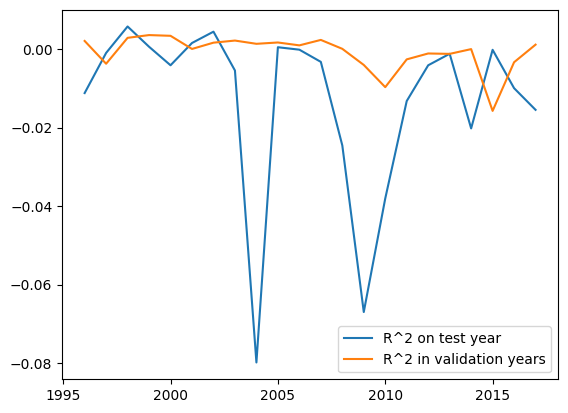

In [8]:
test_years = list(range(1996, 2018))

pyplot.plot(test_years, test_r2s, label="R^2 on test year")
pyplot.plot(test_years, validation_r2s, label="R^2 in validation years")
pyplot.legend()
pyplot.show()

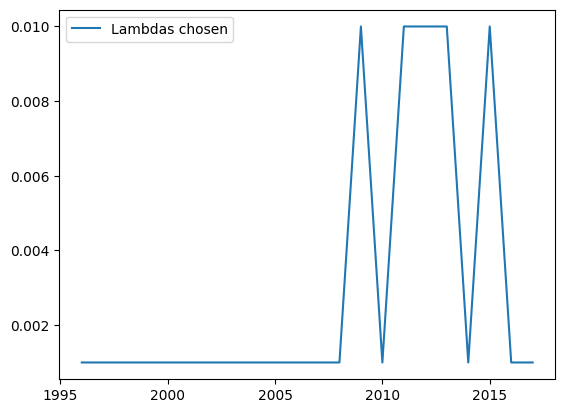

In [10]:
pyplot.plot(test_years, lambdas, label="Lambdas chosen")
pyplot.legend()
pyplot.show()